**1. Installation**

Load your dataset

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
#!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
#!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/drive/MyDrive/lung_cancer_model/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

**Graphics Details**

In [16]:
!nvidia-smi

Tue May 17 15:55:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |   1149MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**2. Image Dataset**

Load your annotated dataset


In [17]:
# Extract Images
images_path = "/content/drive/MyDrive/lung_cancer_model/lc_dataset_v6.zip"
train_annotations_path = "/content/drive/MyDrive/lung_cancer_model/train.json"
val_annotations_path = "/content/drive/MyDrive/lung_cancer_model/test.json"

extract_images(os.path.join("/content/",images_path), "/content/lc_dataset_v6")

Extracted: 340 images


In [18]:
dataset_train = load_image_dataset(os.path.join("/content/", train_annotations_path), "/content/lc_dataset_v6", "train")
dataset_val = load_image_dataset(os.path.join("/content/", val_annotations_path), "/content/lc_dataset_v6", "test")
class_number = dataset_train.count_classes()

print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/lung_cancer_model/train.json
Annotation json path:  /content/drive/MyDrive/lung_cancer_model/test.json
Train: 240
Train: 7
Classes: 1


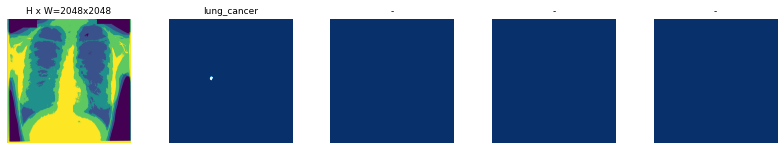

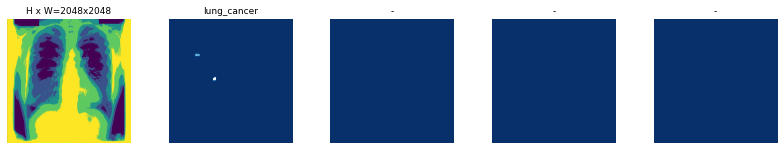

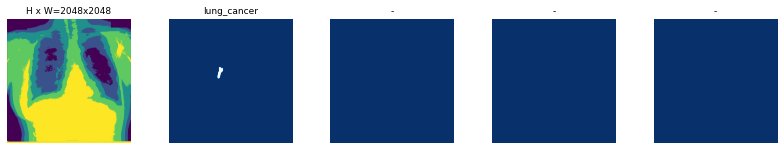

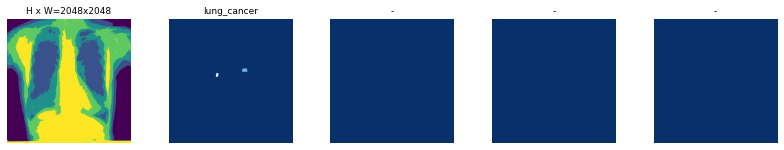

In [19]:
# Load image samples
display_image_samples(dataset_train)

**3. Training**

Train Mask RCNN on your custom Dataset.

In [20]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

/content/drive/MyDrive/lung_cancer_model/Mask_RCNN/mask_rcnn_coco.h5


In [22]:
# Start Training
epoch_count=5
train_head(model, dataset_train, dataset_val, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/lung_cancer_model/Mask_RCNN/logs/object20220517T1555/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4      

**4. Detection**

In [23]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/lung_cancer_model/Mask_RCNN/logs/object20220517T1555/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    1.00000  max:  253.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    1.00000  max:  253.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -115.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


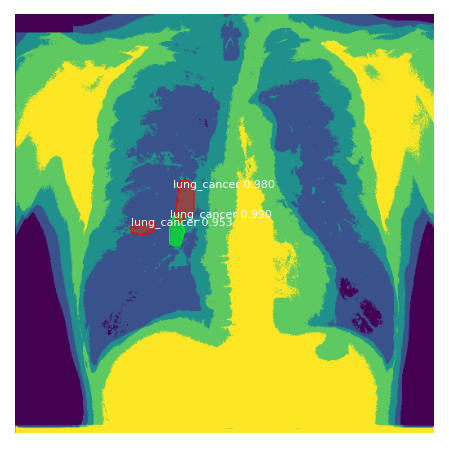

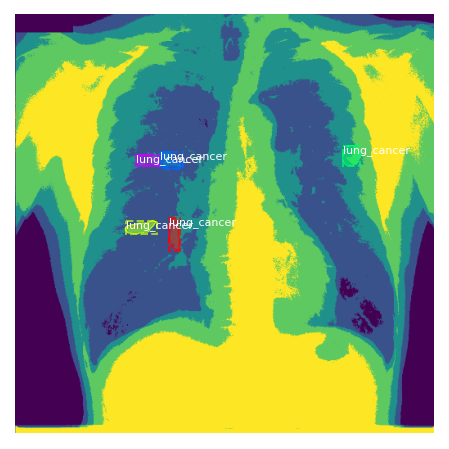

In [31]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)